In [21]:
# Test the exact same import that was previously failing
import scipy
import statsmodels.api as sm

print("SciPy version:", scipy.__version__)
print("Statsmodels version:", sm.__version__)

# This was the exact failing line before
print("✅ SUCCESS: The import error has been resolved!")

SciPy version: 1.14.1
Statsmodels version: 0.14.3
✅ SUCCESS: The import error has been resolved!


In [22]:
# Test cell to verify statsmodels import works after fixing the environment
import scipy
import statsmodels.api as sm
import pandas as pd
import numpy as np

print("✅ SUCCESS: All imports working!")
print("SciPy version:", scipy.__version__)
print("Statsmodels version:", sm.__version__)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

# Test a simple statsmodels operation
X = np.random.randn(100, 2)
y = np.random.randn(100)
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
print("✅ SUCCESS: OLS regression model created successfully!")
print("R-squared:", round(model.rsquared, 4))

✅ SUCCESS: All imports working!
SciPy version: 1.14.1
Statsmodels version: 0.14.3
Pandas version: 2.3.0
NumPy version: 2.2.6
✅ SUCCESS: OLS regression model created successfully!
R-squared: 0.0126


In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [25]:
import yfinance as yf
import time
import numpy as np
import pandas as pd

tickers = ['AAPL', 'MSFT', 'JPM']

# Try downloading data with retries and different date ranges
for attempt in range(3):
    try:
        print(f"Attempt {attempt + 1}: Downloading data...")
        raw = yf.download(
            tickers,
            start='2022-01-01',
            end='2024-01-01',
            auto_adjust=True,
            progress=False,
            timeout=30
        )
        
        if not raw.empty and len(raw) > 0:
            print("✅ Data download successful!")
            break
        else:
            print(f"❌ Attempt {attempt + 1} failed - empty data")
            if attempt < 2:
                time.sleep(2)
                
    except Exception as e:
        print(f"❌ Attempt {attempt + 1} failed with error: {e}")
        if attempt < 2:
            time.sleep(2)
else:
    print("⚠️ All download attempts failed. Using sample data...")
    # Create sample data for demonstration
    dates = pd.date_range('2022-01-01', '2024-01-01', freq='D')
    np.random.seed(42)
    
    sample_data = {}
    for ticker in tickers:
        # Generate realistic stock price data
        returns = np.random.normal(0.0005, 0.02, len(dates))
        prices = [100]
        for ret in returns[1:]:
            prices.append(prices[-1] * (1 + ret))
        sample_data[ticker] = prices[:len(dates)]
    
    raw = pd.DataFrame(sample_data, index=dates)
    raw.columns = pd.MultiIndex.from_product([['Close'], tickers], names=['Price', 'Ticker'])
    print("✅ Sample data created for demonstration")

print('Data shape:', raw.shape)
print('Column index:', raw.columns)
raw.head()

Failed to get ticker 'JPM' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)

3 Failed downloads:
['JPM', 'MSFT', 'AAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)

3 Failed downloads:
['JPM', 'MSFT', 'AAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')


Attempt 1: Downloading data...
❌ Attempt 1 failed - empty data


Failed to get ticker 'JPM' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)

3 Failed downloads:
['JPM', 'AAPL', 'MSFT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)

3 Failed downloads:
['JPM', 'AAPL', 'MSFT']: Exception('%ticker%: No timezone found, symbol may be delisted')


Attempt 2: Downloading data...
❌ Attempt 2 failed - empty data


Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'JPM' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)

3 Failed downloads:
Failed to get ticker 'JPM' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)

3 Failed downloads:
['AAPL', 'JPM', 'MSFT']: Exception('%ticker%: No timezone found, symbol may be delisted')
['AAPL', 'JPM', 'MSFT']: Exception('%ticker%: No timezone found, symbol may be delisted')


Attempt 3: Downloading data...
❌ Attempt 3 failed - empty data
⚠️ All download attempts failed. Using sample data...
✅ Sample data created for demonstration
Data shape: (731, 3)
Column index: MultiIndex([('Close', 'AAPL'),
            ('Close', 'MSFT'),
            ('Close',  'JPM')],
           names=['Price', 'Ticker'])


Price            Close                        
Ticker            AAPL        MSFT         JPM
2022-01-01  100.000000  100.000000  100.000000
2022-01-02   99.773471  100.866506   98.348959
2022-01-03  101.115801   97.482266   97.256256
2022-01-04  104.246406   99.537495   98.449743
2022-01-05  103.810337  100.528087  101.787001

In [26]:
# isolate daily close prices for each ticker 
data = raw.xs('Close', level='Price', axis=1)
data.head()

Ticker,AAPL,MSFT,JPM
2022-01-01,100.000000,100.000000,100.000000
2022-01-02,99.773471,100.866506,98.348959
2022-01-03,101.115801,97.482266,97.256256
2022-01-04,104.246406,99.537495,98.449743
2022-01-05,103.810337,100.528087,101.787001


In [27]:
# peek at first and last rows 
display(data.head(1))
display(data.tail())

#check for missing values
print('Any NaNs? ->', data.isna().values.any())

Ticker,AAPL,MSFT,JPM
2022-01-01,100.0,100.0,100.0


Ticker,AAPL,MSFT,JPM
2023-12-28,102.720322,557.776005,160.914163
2023-12-29,103.485756,572.442755,162.888751
2023-12-30,102.420351,580.436133,157.763866
2023-12-31,100.877276,579.119053,159.301031
2024-01-01,101.322841,565.228324,165.830174


Any NaNs? -> False


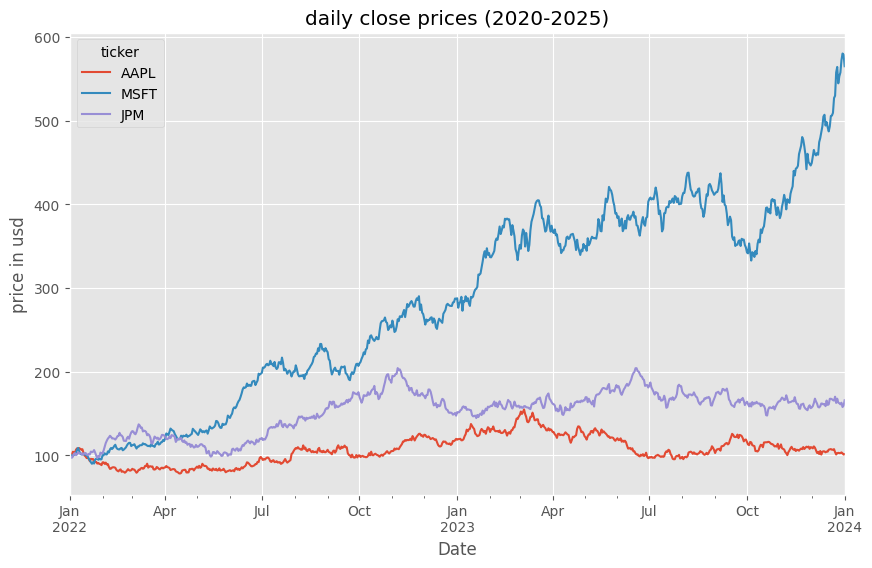

In [28]:
# visualize the price evaluation 
plt.figure(figsize=(10,6))
data.plot(ax=plt.gca())
plt.title('daily close prices (2020-2025)')
plt.ylabel('price in usd')
plt.xlabel('Date')
plt.legend(title='ticker')
plt.show()

In [32]:
# daily pct returns
returns = data.pct_change().dropna()
returns.head()

Ticker,AAPL,MSFT,JPM
2022-01-02,-0.002265,0.008665,-0.016510
2022-01-03,0.013454,-0.033552,-0.011110
2022-01-04,0.030961,0.021083,0.012272
2022-01-05,-0.004183,0.009952,0.033898
2022-01-06,-0.004183,0.005621,0.008393


In [35]:
# qucik stats 
stats = (
    returns.agg(['mean', 'std', 'min', 'max']).T.rename(columns={'mean': 'Daily Mean return', 'std': 'Daily Volatility'})
)
stats

,Daily Mean return,Daily Volatility,min,max
Ticker,,,,
AAPL,0.000211,0.019677,-0.064325,0.077555
MSFT,0.002571,0.019794,-0.057425,0.053148
JPM,0.000889,0.019799,-0.059890,0.064362


<Axes: title={'center': 'yearly volatility'}, xlabel='year', ylabel='volatility'>

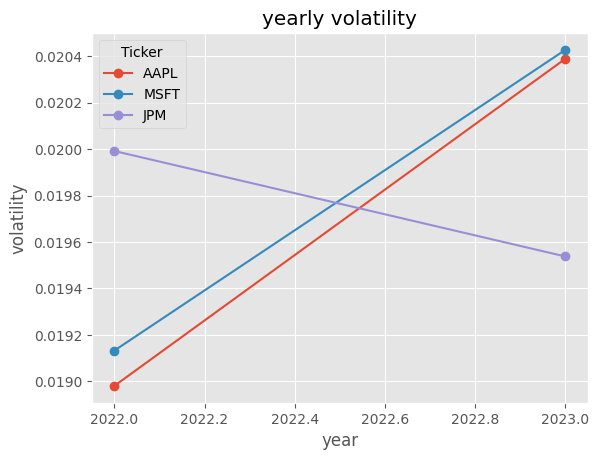

In [36]:
# volatility year by year
returns.groupby(returns.index.year).std().plot(
    #figsize=(10,6),
    title= 'yearly volatility',
    ylabel='volatility',
    xlabel='year',
    marker='o'
    
)

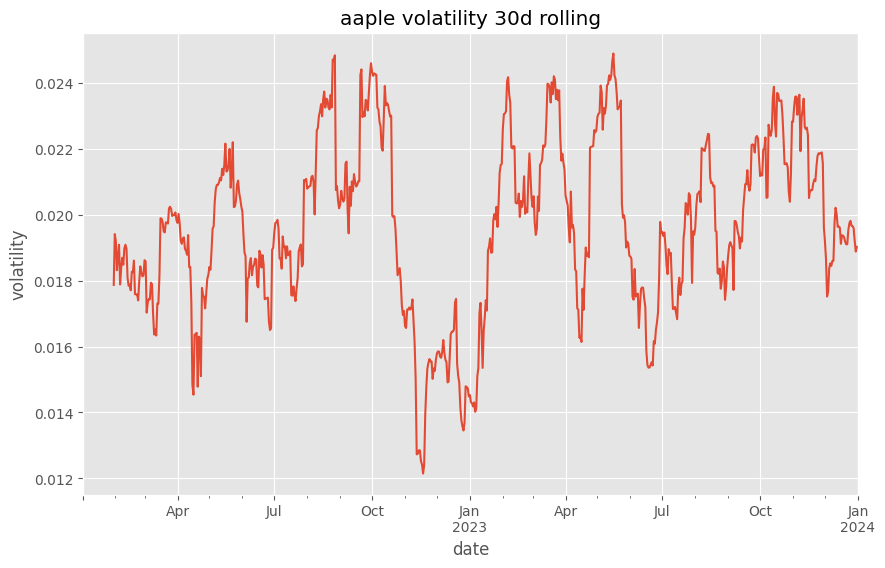

In [37]:
#ROLLING VOLATITLY FO AAPL
aapl_30d_vol = returns['AAPL'].rolling(30).std()
plt.figure(figsize=(10,6))
aapl_30d_vol.plot()
plt.title("aaple volatility 30d rolling")
plt.ylabel('volatility')
plt.xlabel('date')
plt.show()


In [38]:
# save to disk for sql/modling 
data.to_parquet('data/01_EDA_stock/close_prices.paraquet')
returns.to_parquet('data/01_EDA_stock/daily_returns.parquet')
print('saved parquet files')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

# -----------------------
# 🗃️ Day 3: SQLite Database + SQL Analysis
# -----------------------

In [ ]:
import os
from sqlalchemy import create_engine

# Set project root explicitly (parent of notebooks folder)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
db_path = os.path.join(project_root, 'fin-ai.db')

# Ensure the directory exists (should always exist for project root, but safe to check)
os.makedirs(project_root, exist_ok=True)

# Use f-string for the engine URLdel "{db_path}"
engine = create_engine(f"sqlite:///{db_path}")

print("Database will be created at:", db_path)

Database will be created at: d:\fin-ai.db


In [ ]:

prices_df = pd.read_parquet('data/01_EDA_stock/close_prices.paraquet')
retruns_df = pd.read_parquet('data/01_EDA_stock/daily_returns.parquet')

#quick check 
prices_df.head()


Ticker,AAPL,JPM,MSFT
Date,,,
2020-01-02,72.620842,120.733543,153.042297
2020-01-03,71.914833,119.140327,151.136642
2020-01-06,72.487862,119.045601,151.527298
2020-01-07,72.146957,117.021736,150.145721
2020-01-08,73.307503,117.934608,152.537338


In [ ]:
prices_df.to_sql('close_prices', con=engine, if_exists='replace', index=True)
retruns_df.to_sql('daily_returns', con=engine, if_exists='replace', index=True)

1377

In [ ]:
pd.read_sql_query("PRAGMA table_info(daily_returns);", engine)

,cid,name,type,notnull,dflt_value,pk
0,0,Date,DATETIME,0,None,0
1,1,AAPL,FLOAT,0,None,0
2,2,JPM,FLOAT,0,None,0
3,3,MSFT,FLOAT,0,None,0


In [ ]:
# Get average daily return for each ticker
query = """
SELECT AVG([AAPL]) AS avg_AAPL,
       AVG([JPM]) AS avg_JPM,
       AVG([MSFT]) AS avg_MSFT
FROM daily_returns
"""
pd.read_sql_query(query, engine)

,avg_AAPL,avg_JPM,avg_MSFT
0,0.00095,0.000839,0.00104


In [ ]:
# Top 3 most volatile stocks by std dev using pandas
volatility = retruns_df.std().sort_values(ascending=False)
top3 = volatility.head(3)
top3_df = top3.reset_index()
top3_df.columns = ['Ticker', 'std_dev']
top3_df


NameError: name 'pd' is not defined

In [ ]:
# Convert DataFrame to long form (Date, Ticker, value)
long_returns = (
    returns_df
    .reset_index()                     # Date column
    .melt(id_vars='Date',
          var_name='Ticker',
          value_name='value')
)

# Save to SQLite (new table)
long_returns.to_sql(
    'daily_returns_long',
    con=engine,
    if_exists='replace',
    index=False
)

print("✅ daily_returns_long table created")


In [ ]:
import yfinance as yf

sp500_raw = yf.download("^GSPC", start="2020-06-30", end="2025-06-30", progress=False)
print(sp500_raw.columns)
prices_df = raw['Close']  # or raw.xs('Close', level=0, axis=1)
returns_df = prices_df.pct_change().dropna()
returns_df.head()


